In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('StudentsPerformance.csv')

#Let's get familiar with the data we're working with.

display(df.head())
display(df.tail())
display(df.info())
display(df.describe())
display(df.sample(10))

#So there's no null values, 1000 rows of data with 8 columns cool.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
321,female,group E,high school,standard,none,75,86,79
289,male,group E,some high school,standard,completed,77,76,77
46,female,group A,associate's degree,standard,completed,55,65,62
568,male,group B,high school,free/reduced,none,63,48,47
23,female,group C,some high school,standard,none,69,73,73
438,male,group C,high school,standard,none,70,56,51
322,female,group C,some college,standard,none,71,81,80
638,male,group E,some college,standard,none,86,76,74
316,female,group D,master's degree,standard,completed,77,82,91
869,male,group C,associate's degree,free/reduced,none,49,51,51


Let us see the breakdown between male and women


mean                            
       math score reading score writing score
gender                                       
female  63.633205     72.608108     72.467181
male    68.728216     65.473029     63.311203

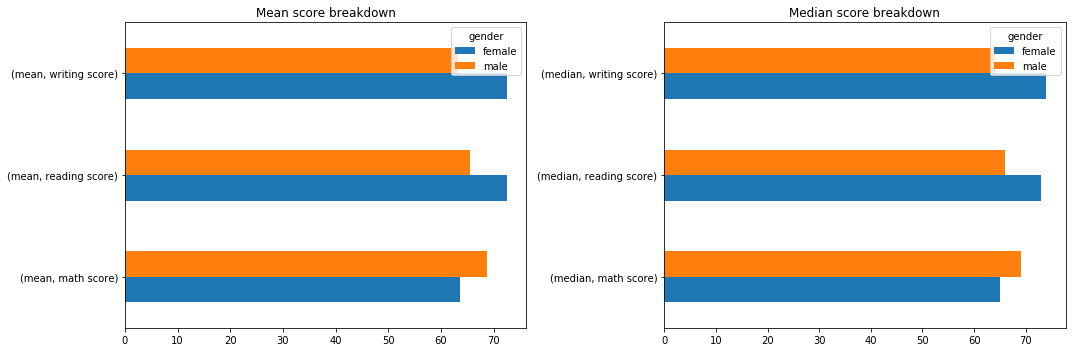

In [146]:
#Let's begin by breaking down gender and analzying their data

gender_mean = df.pivot_table(values = ['math score','reading score','writing score'], index = 'gender',
                             aggfunc = ([np.mean]))
gender_median = df.pivot_table(values = ['math score','reading score','writing score'], index = 'gender',
                             aggfunc = ([np.median]))

#Let's begin plotting the stuff I found above
print('Let us see the breakdown between male and women')
display(gender_pivot)

fig, (ax1,ax2) = plt.subplots(ncols = 2, nrows =1, figsize = (15,5))

ax1 = gender_mean.T.plot(kind = 'barh',ax = ax1)
ax1.set_title('Mean score breakdown')
plt.tight_layout()

ax2 = gender_median.T.plot(kind = 'barh', ax = ax2)
ax2.set_title('Median score breakdown')
plt.tight_layout()
plt.show()



,index,gender
0,female,518
1,male,482


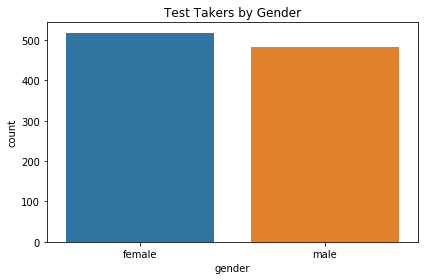

In [159]:
gender = (df['gender'].value_counts().reset_index())
display(gender)

sns.countplot(x = 'gender', data = df)
plt.title('Test Takers by Gender')
plt.tight_layout()
plt.show()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
114,female,group E,bachelor's degree,standard,completed,99,100,100
149,male,group E,associate's degree,free/reduced,completed,100,100,93
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100


,index,gender
0,female,20
1,male,8


The % of people who got over 90 in all three exams out of total students 2.8000000000000003
The % of people who got over 90 in all three exams out of  total men 1.6597510373443984
The % of people who got over 90 in all three exams out of of total women 3.861003861003861


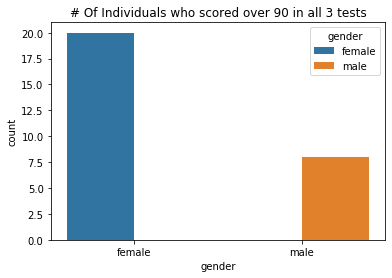

In [170]:
#let's see how many people got 90 and above for all three subjects
big_scores = df[(df['math score'] >= 90) & (df['reading score'] >= 90) & (df['writing score'] >=90)]
display(big_scores.head())
display(big_scores['gender'].value_counts().reset_index())

proportion = (big_scores['gender'].value_counts().sum() / df['gender'].value_counts().sum()) * 100

big_scores_men = big_scores[big_scores['gender']=='male']
big_scores_women = big_scores[big_scores['gender'] =='female']

p_men = (big_scores_men['gender'].value_counts().sum() / 482) *100
p_women = (big_scores_women['gender'].value_counts().sum() / 518) * 100

print('The % of people who got over 90 in all three exams out of total students ' + str(proportion))
print('The % of people who got over 90 in all three exams out of  total men ' + str(p_men))
print('The % of people who got over 90 in all three exams out of of total women ' + str(p_women))

sns.countplot(data = big_scores, hue ='gender', x = 'gender')
plt.title('# Of Individuals who scored over 90 in all 3 tests')
plt.show()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
7,male,group B,some college,free/reduced,none,40,43,39
10,male,group C,associate's degree,standard,none,58,54,52
11,male,group D,associate's degree,standard,none,40,52,43
14,female,group A,master's degree,standard,none,50,53,58


,index,test preparation course
0,completed,17
1,none,11


,index,test preparation course
0,none,153
1,completed,37


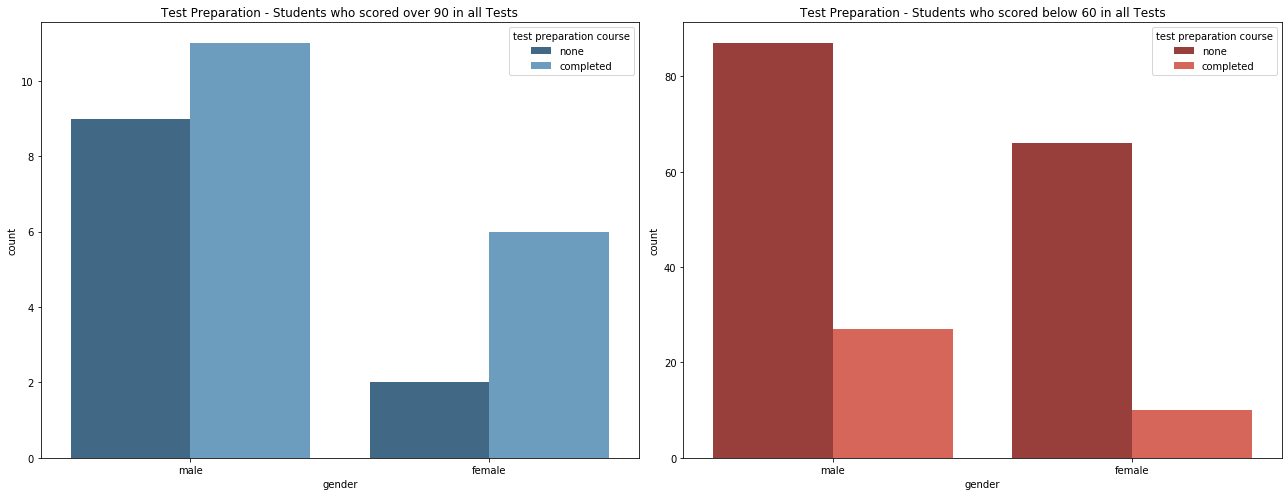

In [185]:
idiots = df[(df['math score'] < 60) & (df['reading score'] < 60) & (df['writing score'] <60)]

display(idiots.head())
display(big_scores['test preparation course'].value_counts().reset_index())
display(idiots['test preparation course'].value_counts().reset_index())

fig, (ax1,ax2) = plt.subplots(ncols =2 ,nrows =1,figsize = (18,7),sharex = True)
sns.countplot(ax = ax1, data = big_scores, hue = 'test preparation course', x = 'gender', palette = 'Blues_d')
sns.countplot(ax = ax2, data = idiots, hue = 'test preparation course', x = 'gender', palette = 'Reds_d')

ax1.set_title('Test Preparation - Students who scored over 90 in all Tests')
ax2.set_title('Test Preparation - Students who scored below 60 in all Tests')
plt.tight_layout()
plt.show()

,index,parental level of education
0,bachelor's degree,11
1,associate's degree,7
2,some college,4
3,master's degree,3
4,some high school,2
5,high school,1


,index,parental level of education
0,high school,53
1,some high school,43
2,associate's degree,37
3,some college,36
4,bachelor's degree,14
5,master's degree,7


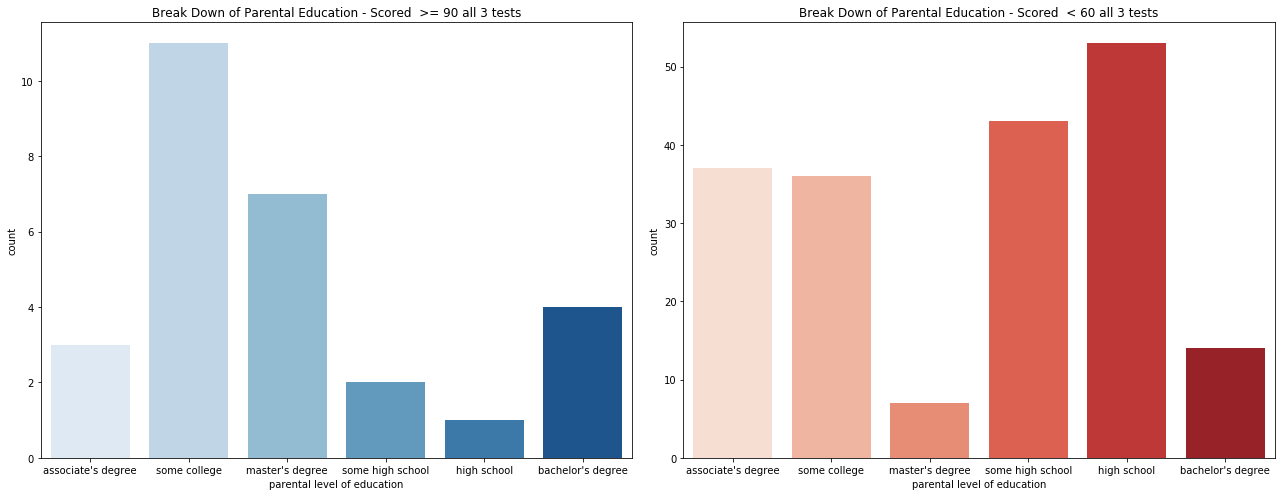

In [596]:
#Let's see if parental education has anything to do with how well a student well do on his exams.
#You would assume so, as their habits would rub off onto their children

display(big_scores['parental level of education'].value_counts().reset_index())
display(idiots['parental level of education'].value_counts().reset_index())


fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1,figsize = (18,7),sharex = True)
sns.countplot(data = big_scores,x = 'parental level of education',ax = ax1,palette ='Blues')
sns.countplot(data = idiots, x ='parental level of education', ax =ax2, palette ='Reds')

ax1.set_title('Break Down of Parental Education - Scored  >= 90 all 3 tests')
ax2.set_title('Break Down of Parental Education - Scored  < 60 all 3 tests')

plt.tight_layout()
plt.show()

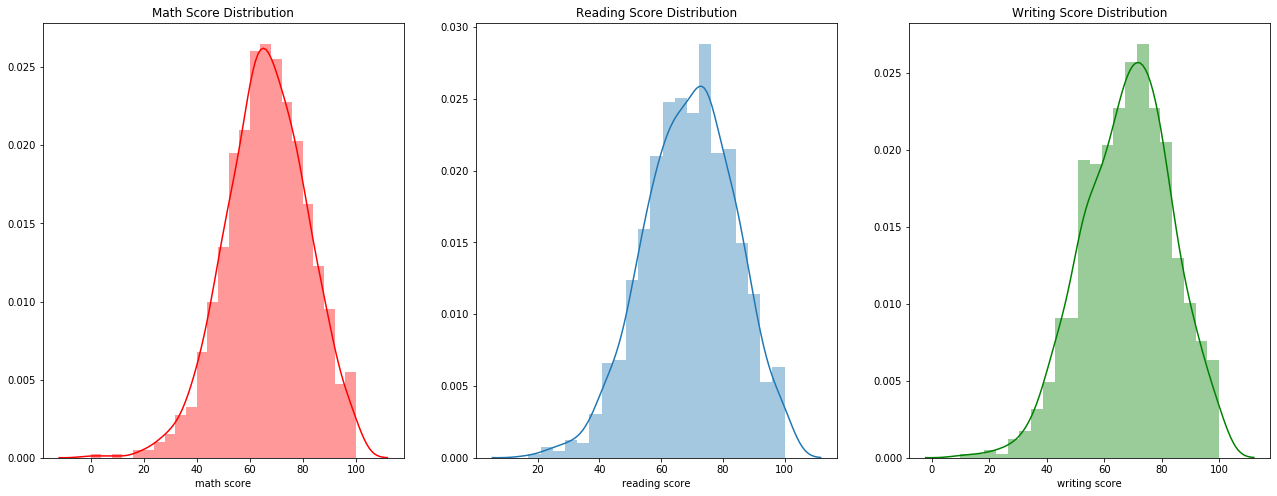

In [411]:
#Let's plot the distrubution of all the scores and see how students did

fig, (ax1,ax2,ax3)= plt.subplots(ncols = 3, nrows =1,figsize = (22,8))

ax1 = sns.distplot(df['math score'],ax = ax1,color = 'red')
ax2 = sns.distplot(df['reading score'], ax =ax2)
ax3 = sns.distplot(df['writing score'], ax =ax3, color='green')

ax1.set_title('Math Score Distribution')
ax2.set_title('Reading Score Distribution')
ax3.set_title('Writing Score Distribution')

plt.show()

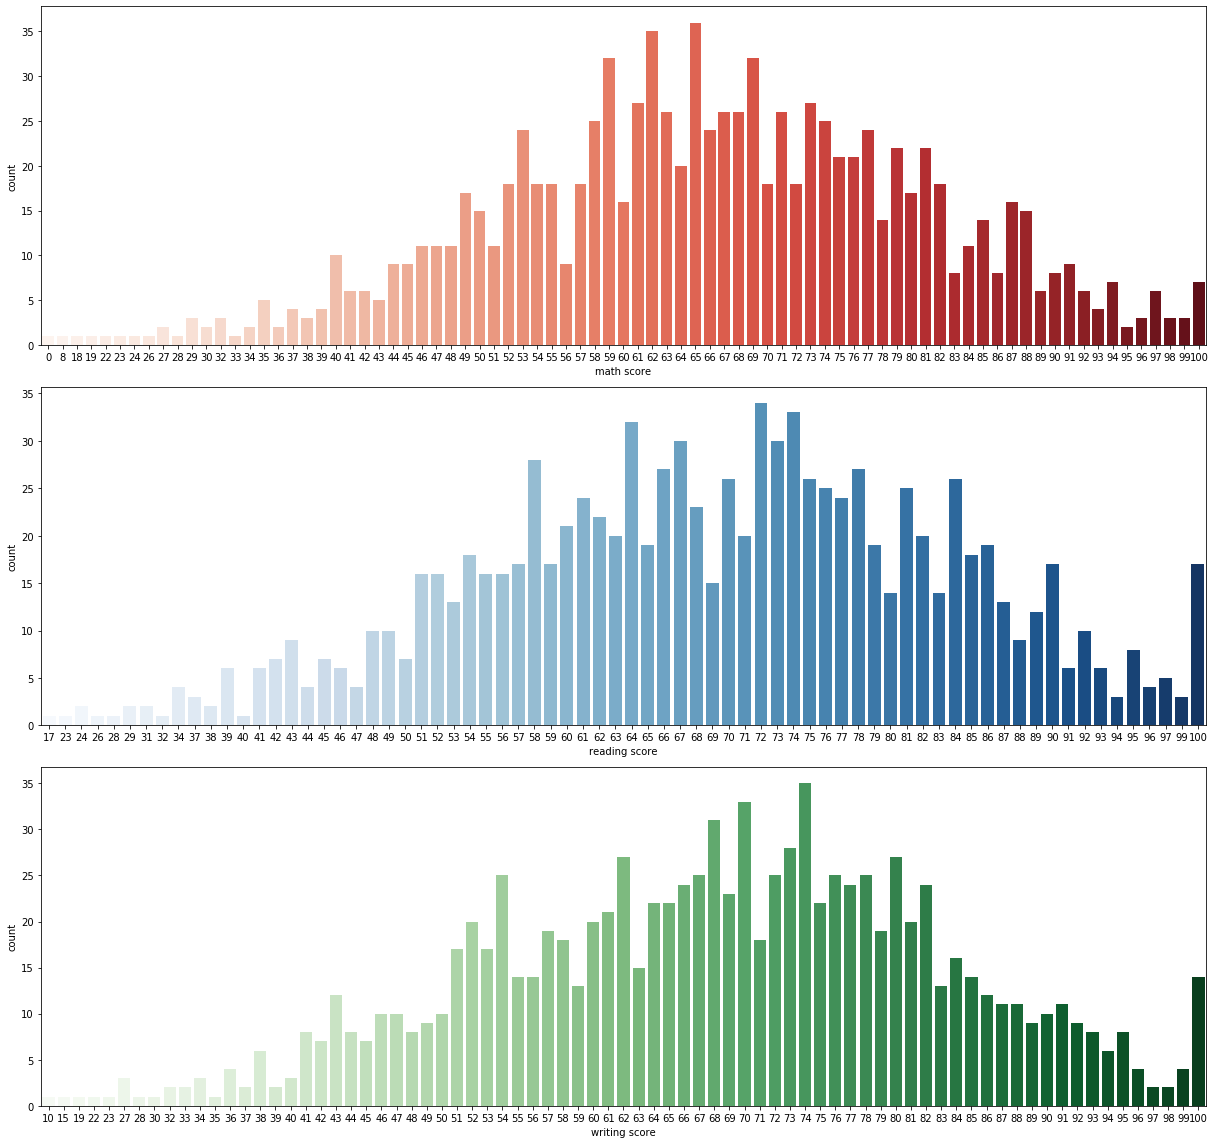

In [232]:
#Let's plot some frequency tables for all the 3 tests and see how well people score

fig, (ax1,ax2,ax3) = plt.subplots(ncols = 1, nrows =3,figsize = (17,16))

sns.countplot(data = df, x ='math score',ax = ax1,palette ='Reds')
sns.countplot(data = df, x ='reading score',ax = ax2, palette ='Blues')
sns.countplot(data = df, x ='writing score',ax = ax3, palette ='Greens')

plt.tight_layout()
plt.show()

,index,race/ethnicity
0,group C,114
1,group D,95
2,group B,69
3,group E,41
4,group A,36


,index,race/ethnicity
0,group C,205
1,group D,167
2,group B,121
3,group E,99
4,group A,53


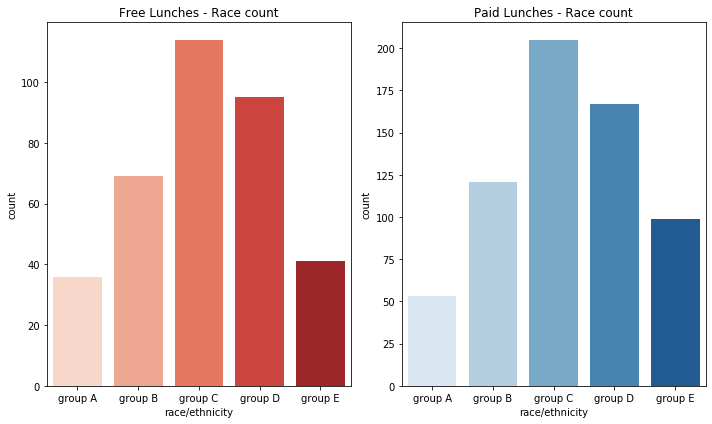

In [580]:
#Let's see if having free/reduced lunchs lead to poor scores overall

free = df[df['lunch'] =='free/reduced'].sort_values('race/ethnicity')
paid = df[df['lunch'] == 'standard'].sort_values('race/ethnicity')

display(free['race/ethnicity'].value_counts().reset_index())
display(paid['race/ethnicity'].value_counts().reset_index())

fig, (ax1,ax2) = plt.subplots(figsize = (10,6), ncols = 2, nrows =1,sharex = True)
sns.countplot(data = free, x ='race/ethnicity', ax =ax1, palette ='Reds')
sns.countplot(data = paid, x ='race/ethnicity', ax =ax2, palette ='Blues')

ax1.set_title('Free Lunches - Race count')
ax2.set_title('Paid Lunches - Race count')

plt.tight_layout()
plt.show()

In [581]:
lunch = df.groupby('lunch').agg([np.mean,np.median])

display(lunch)

math score        reading score        writing score         \
                   mean median          mean median          mean median   
lunch                                                                      
free/reduced  58.921127     60     64.653521     65     63.022535     64   
standard      70.034109     69     71.654264     72     70.823256     72   

             Final Score         
                    mean median  
lunch                            
free/reduced   62.191549   63.0  
standard       70.827907   71.0

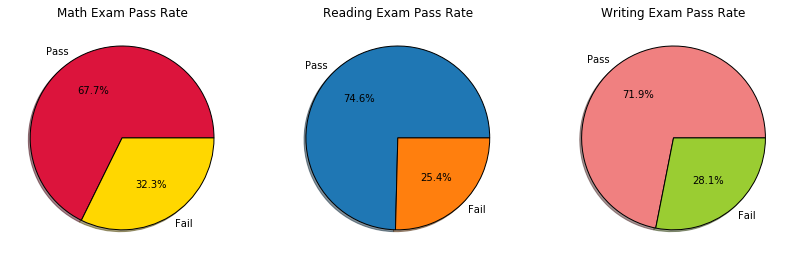

In [409]:
#Let's get the pass rates on all the exams for the people
labels = ['Pass','Fail']

math_rate = (df['math score'] >= 60).value_counts()
reading_rate = (df['reading score'] >= 60).value_counts()                                                     
writing_rate = (df['writing score'] >= 60).value_counts()

fig, (ax1,ax2,ax3) = plt.subplots(ncols = 3, nrows =1,figsize = (14,6))

ax1.pie(math_rate,labels = labels,shadow = True,wedgeprops = {'edgecolor':'black'}, autopct = '%1.1f%%',
       colors = ['crimson','gold'])

ax2.pie(reading_rate,labels = labels,shadow = True,wedgeprops = {'edgecolor':'black'}, autopct = '%1.1f%%')

ax3.pie(writing_rate,labels = labels,shadow = True,wedgeprops = {'edgecolor':'black'}, autopct = '%1.1f%%',
       colors= ['lightcoral','yellowgreen'])

ax1.set_title('Math Exam Pass Rate')
ax2.set_title('Reading Exam Pass Rate')
ax3.set_title('Writing Exam Pass Rate')

plt.show()

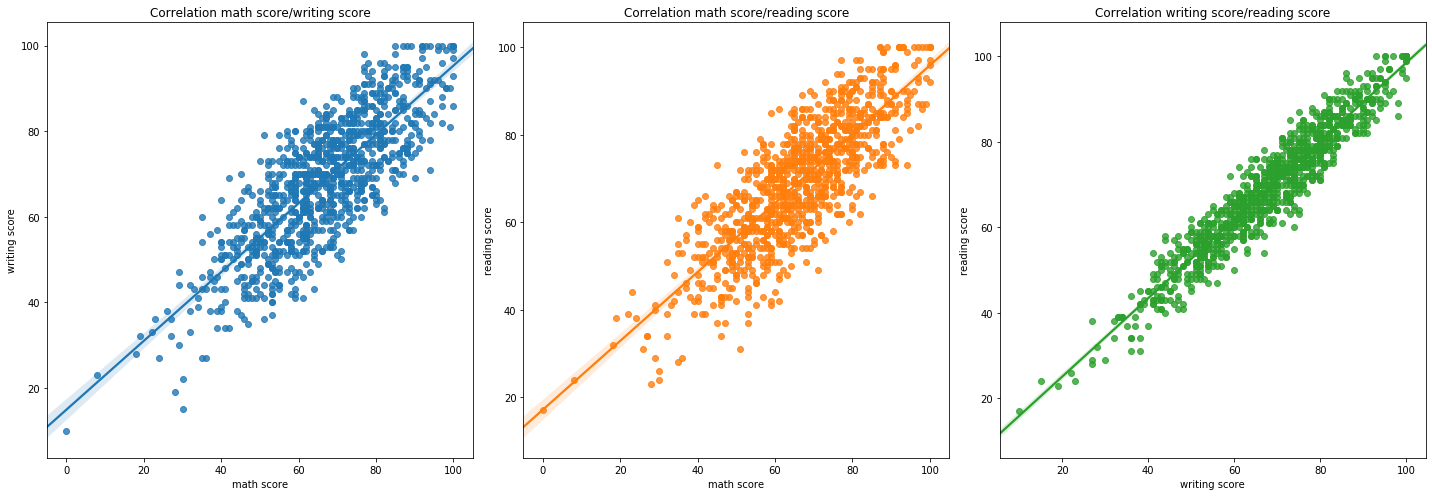

In [414]:
#Let's create a regression plot

fig,(ax1,ax2,ax3) = plt.subplots(ncols = 3, nrows =1,figsize = (20,7))

def regplot(x,y, df, ax):
    sns.regplot(x = x , y = y, data =df, ax = ax)
    return ax.set_title('Correlation ' + x+'/'+y)

regplot('math score', 'writing score',df,ax1)
regplot('math score','reading score',df,ax2)
regplot('writing score','reading score',df, ax3)

plt.tight_layout()
plt.show()

In [462]:
#Let's calculate a letter grade and see how well each student did based on the average of all three of their grades

df['Final Score'] = ((df['math score'] + df['reading score'] + df['writing score']) / 3).round()

letter_grades = []
for item in df['Final Score']:
    if item >=60 and item <70:
        letter_grades.append('D')
    elif item >=70 and item <80:
        letter_grades.append('C')
    elif item >= 80 and item <90:
        letter_grades.append('B')
    elif item >= 90:
        letter_grades.append('A')
    else:
        letter_grades.append('F')
        
df['Letter Grade'] = letter_grades

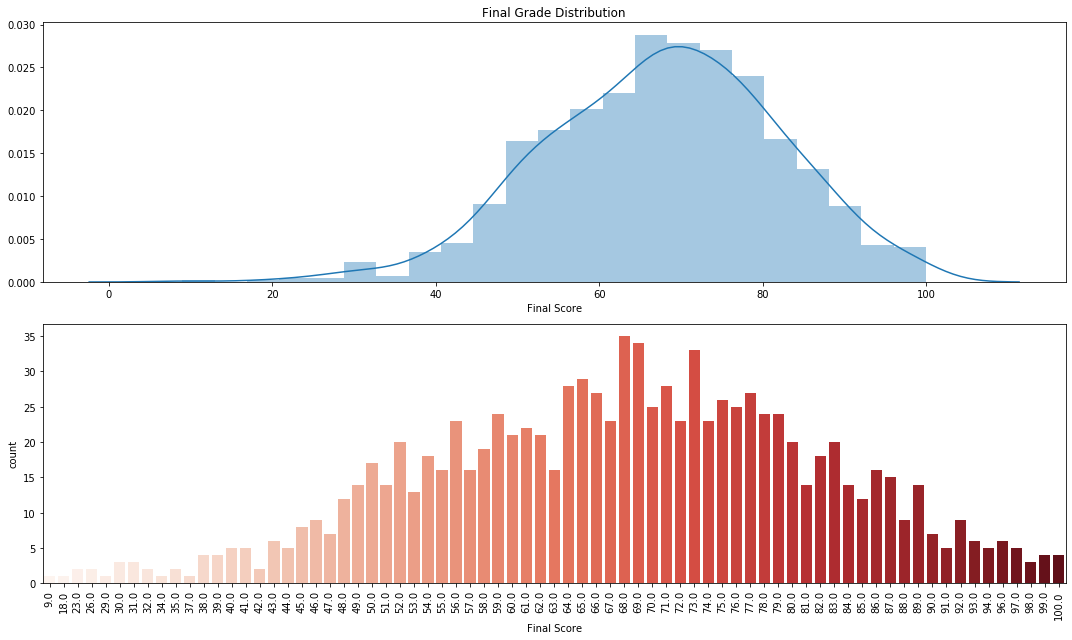

67.762

68.0

In [470]:
#Let's plot the distrubtion of the students final grades

fig, (ax1,ax2) = plt.subplots(ncols =1, nrows =2, figsize = (15,9))
sns.distplot(df['Final Score'], ax =ax1)
sns.countplot(x = df['Final Score'],ax =ax2, palette = 'Reds')
plt.xticks(rotation = 90)

ax1.set_title('Final Grade Distribution')
plt.tight_layout()
plt.show()

display(df['Final Score'].mean())
display(df['Final Score'].median())

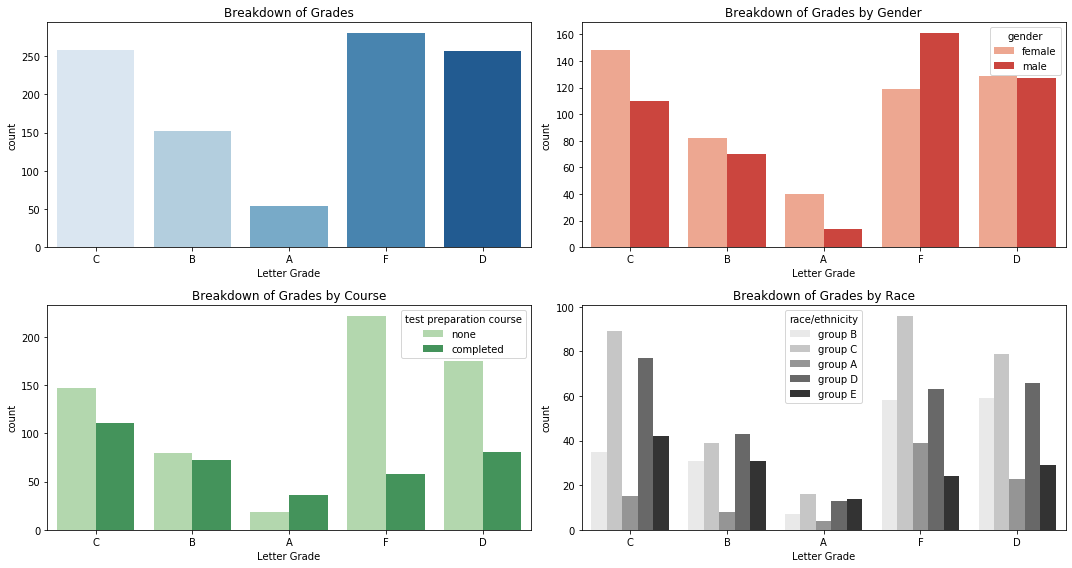

,Letter Grade,Count
0,A,54
1,B,152
2,D,256
3,C,258
4,F,280


In [587]:
#let's get the letter grade counts

letter_grades = df['Letter Grade'].value_counts().sort_values().reset_index()
letter_grades.rename(columns = {'index':'Letter Grade','Letter Grade':'Count'},inplace = True)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols = 2, nrows=2, figsize = (15,8))

sns.countplot(data = df, x = 'Letter Grade', ax =ax1, palette = 'Blues')
sns.countplot(data = df, x = 'Letter Grade', ax= ax2, palette = 'Reds', hue = 'gender')
sns.countplot(data = df, x = 'Letter Grade', ax= ax3, palette = 'Greens', hue = 'test preparation course')
sns.countplot(data = df, x = 'Letter Grade', ax= ax4, palette = 'Greys', hue = 'race/ethnicity')

ax1.set_title('Breakdown of Grades')
ax2.set_title('Breakdown of Grades by Gender')
ax3.set_title('Breakdown of Grades by Course')
ax4.set_title('Breakdown of Grades by Race')

plt.tight_layout()
plt.show()

display(letter_grades)

,index,Letter Grade
0,F,280
1,C,258
2,D,256
3,B,152
4,A,54


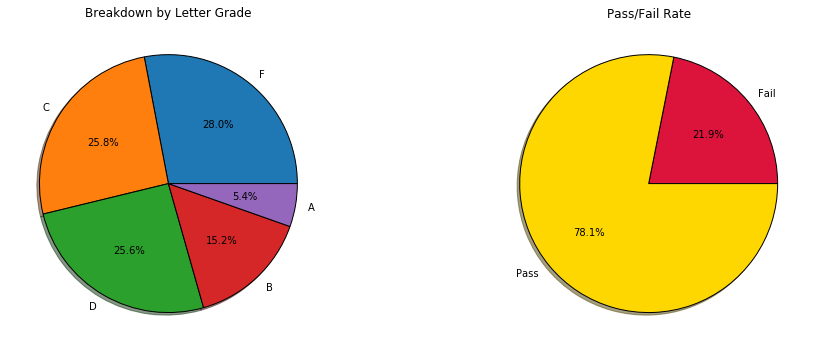

In [584]:
#Let's plot the passrate real quick

grades = df['Letter Grade'].value_counts().reset_index()
display(grades)

labels = list(grades['index'])
pass_fail = [280,1000]


fig,(ax1,ax2) = plt.subplots(ncols =2, nrows =1, figsize = (15,5))

ax1.pie(grades['Letter Grade'],labels =labels,shadow = True,wedgeprops = {'edgecolor':'black'}, autopct = '%1.1f%%')
ax2.pie(pass_fail, labels = ['Fail','Pass'], shadow = True, wedgeprops ={'edgecolor':'black'},
        autopct = '%1.1f%%',colors =['crimson','gold'])

ax1.set_title('Breakdown by Letter Grade')
ax2.set_title('Pass/Fail Rate')

plt.tight_layout()
plt.show()